## This notebook analyzes the accident dataset of Germany. The data contains information about accidents in 16 Federal states of Germany for the year 2021. It has 25 different fields. The metdata information is available in the pdf.

## Reading csv data with pandas

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import calendar
import folium
from folium import plugins
from folium.plugins import HeatMapWithTime

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("../data/accident_data.csv",sep=";",decimal=',')
data

OBJECTID   UIDENTSTLAE  ULAND  UREGBEZ  UKREIS  UGEMEINDE  UJAHR  \
0              1  1.210308e+18      1        0      54        165   2021   
1              2  1.210608e+18      1        0       2          0   2021   
2              3  1.210610e+18      1        0      61          7   2021   
3              4  1.210524e+18      1        0      53         41   2021   
4              5  1.210529e+18      1        0      55         32   2021   
...          ...           ...    ...      ...     ...        ...    ...   
233203    233204  1.621122e+19     16        0      73         77   2021   
233204    233205  1.621123e+19     16        0      52          0   2021   
233205    233206  1.621122e+19     16        0      53          0   2021   
233206    233207  1.621122e+19     16        0      65         86   2021   
233207    233208  1.621122e+19     16        0      77         43   2021   

        UMONAT  USTUNDE  UWOCHENTAG  ...  IstRad  IstPKW  IstFuss  IstKrad  \
0            3        7           2  ...       0       1        0        0   
1            6       15           3  ...       0       1        0        0   
2            6       13           5  ...       1       0        0        0   
3            5       11           2  ...       1       0        0        0   
4            5       15           7  ...       1       1        0        0   
...        ...      ...         ...  ...     ...     ...      ...      ...   
233203      12       11           4  ...       1       0        0        0   
233204      12        8           4  ...       0       1        0        0   
233205      12       12           2  ...       0       1        1        0   
233206      12       10           5  ...       0       1        0        0   
233207      12       18           7  ...       0       1        0        0   

        IstGkfz  IstSonstige      LINREFX      LINREFY  XGCSWGS84  YGCSWGS84  
0             0            0  483995.3944  6069091.089   8.751233  54.768787  
1             0            0  573010.0981  6020090.876  10.122558  54.323450  
2             0            1  527231.3885  5972658.256   9.414457  53.901645  
3             0            0  614902.9736  5963896.514  10.745101  53.810913  
4             0            0  617331.1803  5996138.283  10.794357  54.100018  
...         ...          ...          ...          ...        ...        ...  
233203        0            0  667716.3570  5613648.058  11.372512  50.650516  
233204        0            0  716678.0317  5637572.423  12.078252  50.849210  
233205        0            0  681465.6290  5644593.455  11.582086  50.924402  
233206        0            1  659448.2672  5693630.180  11.290802  51.371509  
233207        0            0  727955.2400  5648104.400  12.244767  50.939436  

[233208 rows x 25 columns]

## Printing information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233208 entries, 0 to 233207
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   OBJECTID     233208 non-null  int64  
 1   UIDENTSTLAE  233208 non-null  float64
 2   ULAND        233208 non-null  int64  
 3   UREGBEZ      233208 non-null  int64  
 4   UKREIS       233208 non-null  int64  
 5   UGEMEINDE    233208 non-null  int64  
 6   UJAHR        233208 non-null  int64  
 7   UMONAT       233208 non-null  int64  
 8   USTUNDE      233208 non-null  int64  
 9   UWOCHENTAG   233208 non-null  int64  
 10  UKATEGORIE   233208 non-null  int64  
 11  UART         233208 non-null  int64  
 12  UTYP1        233208 non-null  int64  
 13  ULICHTVERH   233208 non-null  int64  
 14  USTRZUSTAND  233208 non-null  int64  
 15  IstRad       233208 non-null  int64  
 16  IstPKW       233208 non-null  int64  
 17  IstFuss      233208 non-null  int64  
 18  IstKrad      233208 non-

## Checking for null values

In [4]:
data.isnull().sum().any()

False

##  Conclusion: False means no null values present in the dataset

# Next, we show various analysis of accident dataset

## 1. Which German states has highest number accidents in 2021 ?

In [5]:
data_accident_count_per_state=data.groupby(['ULAND']).size().reset_index(name='accident_count')
data_accident_count_per_state

ULAND  accident_count
0       1           10034
1       2            6246
2       3           24253
3       4            2300
4       5           49004
5       6           15579
6       7           10993
7       8           27017
8       9           40771
9      10            2741
10     11           11267
11     12            7563
12     13            4251
13     14           10701
14     15            6029
15     16            4459

## ULAND id has mapping to Federal states and given in the metadata pdf. 
## Creating a dictionary corrsponding to the states.

In [6]:
states={1:"Schleswig-Holstein",2: "Hamburg",3:"Niedersachsen",4:"Bremen",5:"Nordrhein-Westfalen",6:"Hessen",7:"Rheinland-Pfalz",
8:"Baden-Württemberg",9:"Bayern",10:"Saarland",11:"Berlin",12:"Brandenburg",13:"Mecklenburg-Vorpommern",14:"Sachsen",
15:"Sachsen-Anhalt",16:"Thüringen"} 

In [7]:
states_df=pd.DataFrame(states.items(), columns=['ULAND', 'states'])

In [8]:
states_df

ULAND                  states
0       1      Schleswig-Holstein
1       2                 Hamburg
2       3           Niedersachsen
3       4                  Bremen
4       5     Nordrhein-Westfalen
5       6                  Hessen
6       7         Rheinland-Pfalz
7       8       Baden-Württemberg
8       9                  Bayern
9      10                Saarland
10     11                  Berlin
11     12             Brandenburg
12     13  Mecklenburg-Vorpommern
13     14                 Sachsen
14     15          Sachsen-Anhalt
15     16               Thüringen

##  Joining two dataframes based on ULAND field

In [9]:
state_df_merged=pd.merge(data_accident_count_per_state,states_df,on="ULAND")

In [10]:
state_df_merged.head()

ULAND  accident_count               states
0      1           10034   Schleswig-Holstein
1      2            6246              Hamburg
2      3           24253        Niedersachsen
3      4            2300               Bremen
4      5           49004  Nordrhein-Westfalen

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

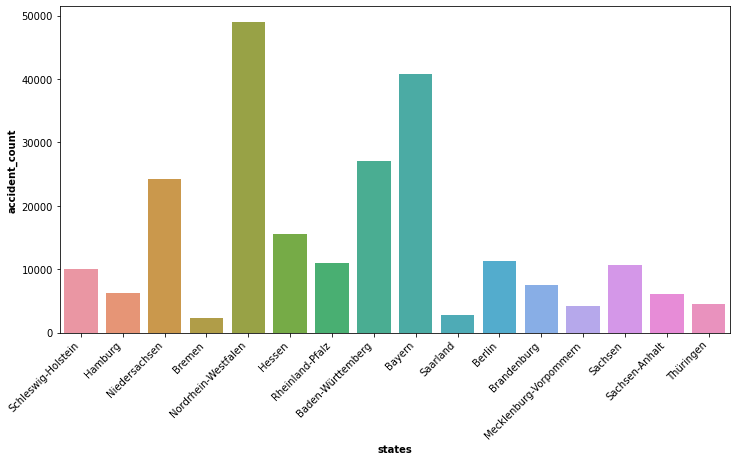

In [11]:
plt.figure(figsize=(12, 6))

bar=sns.barplot(data=state_df_merged, x="states", y="accident_count")
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
bar.set_xlabel(bar.get_xlabel(), fontdict={'weight': 'bold'})
bar.set_ylabel(bar.get_ylabel(), fontdict={'weight': 'bold'})

plt.show()

## NRW and Bayern are the most accident prone states in Germany in 2021. These two stated also most populated states in Germany (https://www.statista.com/statistics/1127686/population-by-federal-state-germany/#:~:text=The%20most%20populated%20federal%20state,rounded%20up%20the%20top%20three.)

# 2. Accidents leading to death

In [12]:
data_death=data.loc[data["UKATEGORIE"]==1]
data_death

OBJECTID   UIDENTSTLAE  ULAND  UREGBEZ  UKREIS  UGEMEINDE  UJAHR  \
71            72  1.210520e+18      1        0      59        107   2021   
216          217  1.210330e+18      1        0      57         62   2021   
315          316  1.210531e+18      1        0      56          2   2021   
328          329  1.210131e+18      1        0      54         88   2021   
406          407  1.210530e+18      1        0      53        126   2021   
...          ...           ...    ...      ...     ...        ...    ...   
232660    232661  1.621080e+19     16        0      54          0   2021   
232706    232707  1.621081e+19     16        0      77          9   2021   
232871    232872  1.621080e+19     16        0      54          0   2021   
232957    232958  1.621112e+19     16        0      62         41   2021   
232983    232984  1.621082e+19     16        0      66         92   2021   

        UMONAT  USTUNDE  UWOCHENTAG  ...  IstRad  IstPKW  IstFuss  IstKrad  \
71           5       13           5  ...       0       1        0        0   
216          3       23           3  ...       0       1        0        0   
315          5        9           2  ...       1       0        0        0   
328          1       11           1  ...       0       1        0        0   
406          5       19           1  ...       0       1        0        0   
...        ...      ...         ...  ...     ...     ...      ...      ...   
232660       8       11           3  ...       0       0        1        0   
232706       8        9           2  ...       0       0        0        0   
232871       8       14           1  ...       1       0        0        0   
232957      11       10           5  ...       0       0        1        0   
232983       8       18           7  ...       1       0        0        0   

        IstGkfz  IstSonstige      LINREFX      LINREFY  XGCSWGS84  YGCSWGS84  
71            0            1  522711.5601  6051467.337   9.351642  54.610148  
216           0            0  583207.0576  6011976.946  10.277043  54.248984  
315           1            0  549999.7012  5960879.851   9.759043  53.794092  
328           1            0  484954.0335  6075082.045   8.765823  54.822655  
406           0            0  607495.6748  5934926.716  10.622616  53.552210  
...         ...          ...          ...          ...        ...        ...  
232660        1            0  621173.0728  5607996.858  10.712639  50.611260  
232706        0            1  733024.7605  5649612.787  12.317764  50.950952  
232871        0            0  620716.6146  5606330.816  10.705648  50.596379  
232957        1            0  624556.0183  5707123.170  10.794551  51.501503  
232983        1            0  616388.9627  5613457.973  10.646766  50.661326  

[2252 rows x 25 columns]

## %age of accidents leads to death

In [13]:
(len(data_death)/len(data))*100


0.9656615553497307

# Conclusion: Less than 1 % accidents leads to death in Germany in 2021.

# 3. Which season causes more accidents

In [14]:
def fetachseason(month):
    if month>=3 and month<=5:
        return "Spring"
    if month>=6 and month<=8:
        return "Summer"
    if month>=9 and month<=11:
        return "Autumn"
    if month==12 or month==1 or month== 2:
        return "Winter"

In [15]:
data['season'] = data.apply(lambda row: fetachseason(row['UMONAT']), axis=1)
data

OBJECTID   UIDENTSTLAE  ULAND  UREGBEZ  UKREIS  UGEMEINDE  UJAHR  \
0              1  1.210308e+18      1        0      54        165   2021   
1              2  1.210608e+18      1        0       2          0   2021   
2              3  1.210610e+18      1        0      61          7   2021   
3              4  1.210524e+18      1        0      53         41   2021   
4              5  1.210529e+18      1        0      55         32   2021   
...          ...           ...    ...      ...     ...        ...    ...   
233203    233204  1.621122e+19     16        0      73         77   2021   
233204    233205  1.621123e+19     16        0      52          0   2021   
233205    233206  1.621122e+19     16        0      53          0   2021   
233206    233207  1.621122e+19     16        0      65         86   2021   
233207    233208  1.621122e+19     16        0      77         43   2021   

        UMONAT  USTUNDE  UWOCHENTAG  ...  IstPKW  IstFuss  IstKrad  IstGkfz  \
0            3        7           2  ...       1        0        0        0   
1            6       15           3  ...       1        0        0        0   
2            6       13           5  ...       0        0        0        0   
3            5       11           2  ...       0        0        0        0   
4            5       15           7  ...       1        0        0        0   
...        ...      ...         ...  ...     ...      ...      ...      ...   
233203      12       11           4  ...       0        0        0        0   
233204      12        8           4  ...       1        0        0        0   
233205      12       12           2  ...       1        1        0        0   
233206      12       10           5  ...       1        0        0        0   
233207      12       18           7  ...       1        0        0        0   

        IstSonstige      LINREFX      LINREFY  XGCSWGS84  YGCSWGS84  season  
0                 0  483995.3944  6069091.089   8.751233  54.768787  Spring  
1                 0  573010.0981  6020090.876  10.122558  54.323450  Summer  
2                 1  527231.3885  5972658.256   9.414457  53.901645  Summer  
3                 0  614902.9736  5963896.514  10.745101  53.810913  Spring  
4                 0  617331.1803  5996138.283  10.794357  54.100018  Spring  
...             ...          ...          ...        ...        ...     ...  
233203            0  667716.3570  5613648.058  11.372512  50.650516  Winter  
233204            0  716678.0317  5637572.423  12.078252  50.849210  Winter  
233205            0  681465.6290  5644593.455  11.582086  50.924402  Winter  
233206            1  659448.2672  5693630.180  11.290802  51.371509  Winter  
233207            0  727955.2400  5648104.400  12.244767  50.939436  Winter  

[233208 rows x 26 columns]

In [16]:
data_season=data.groupby(['season']).size().reset_index(name='accident_count')
data_season

season  accident_count
0  Autumn           69300
1  Spring           48936
2  Summer           73679
3  Winter           41293

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

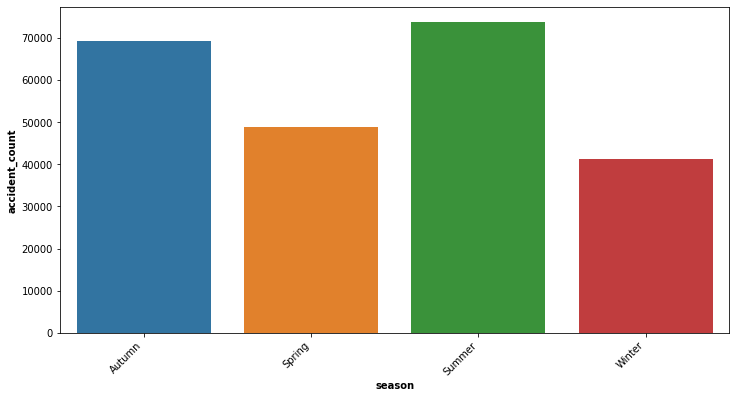

In [17]:
plt.figure(figsize=(12, 6))

bar_season=sns.barplot(data=data_season, x="season", y="accident_count")
bar_season.set_xticklabels(bar_season.get_xticklabels(), rotation=45, horizontalalignment='right')
bar_season.set_xlabel(bar_season.get_xlabel(), fontdict={'weight': 'bold'})
bar_season.set_ylabel(bar_season.get_ylabel(), fontdict={'weight': 'bold'})

plt.show()

# Conclusion: People tend to go out in summer (holidays etc.) more which could be the reason for more accidents

# 4. Which time of the day is more dangerous?

## Divide the day into four parts:- Morning, Afternoon, Evening and Night.

In [18]:
def getDay(stunde):        
    if stunde>=6 and stunde<=11 :
        return "morning"
    if  stunde>=12 and stunde<=15 :
        return "Afternoon"
    if  stunde>=16 and stunde<=18:
        return "Evening";
    if stunde>=19 and stunde<=23  or (stunde>=0 and stunde<6):
        return "Night"

In [19]:
data['day'] = data.apply(lambda row: getDay(row['USTUNDE']), axis=1)
data

OBJECTID   UIDENTSTLAE  ULAND  UREGBEZ  UKREIS  UGEMEINDE  UJAHR  \
0              1  1.210308e+18      1        0      54        165   2021   
1              2  1.210608e+18      1        0       2          0   2021   
2              3  1.210610e+18      1        0      61          7   2021   
3              4  1.210524e+18      1        0      53         41   2021   
4              5  1.210529e+18      1        0      55         32   2021   
...          ...           ...    ...      ...     ...        ...    ...   
233203    233204  1.621122e+19     16        0      73         77   2021   
233204    233205  1.621123e+19     16        0      52          0   2021   
233205    233206  1.621122e+19     16        0      53          0   2021   
233206    233207  1.621122e+19     16        0      65         86   2021   
233207    233208  1.621122e+19     16        0      77         43   2021   

        UMONAT  USTUNDE  UWOCHENTAG  ...  IstFuss  IstKrad  IstGkfz  \
0            3        7           2  ...        0        0        0   
1            6       15           3  ...        0        0        0   
2            6       13           5  ...        0        0        0   
3            5       11           2  ...        0        0        0   
4            5       15           7  ...        0        0        0   
...        ...      ...         ...  ...      ...      ...      ...   
233203      12       11           4  ...        0        0        0   
233204      12        8           4  ...        0        0        0   
233205      12       12           2  ...        1        0        0   
233206      12       10           5  ...        0        0        0   
233207      12       18           7  ...        0        0        0   

        IstSonstige      LINREFX      LINREFY  XGCSWGS84  YGCSWGS84  season  \
0                 0  483995.3944  6069091.089   8.751233  54.768787  Spring   
1                 0  573010.0981  6020090.876  10.122558  54.323450  Summer   
2                 1  527231.3885  5972658.256   9.414457  53.901645  Summer   
3                 0  614902.9736  5963896.514  10.745101  53.810913  Spring   
4                 0  617331.1803  5996138.283  10.794357  54.100018  Spring   
...             ...          ...          ...        ...        ...     ...   
233203            0  667716.3570  5613648.058  11.372512  50.650516  Winter   
233204            0  716678.0317  5637572.423  12.078252  50.849210  Winter   
233205            0  681465.6290  5644593.455  11.582086  50.924402  Winter   
233206            1  659448.2672  5693630.180  11.290802  51.371509  Winter   
233207            0  727955.2400  5648104.400  12.244767  50.939436  Winter   

              day  
0         morning  
1       Afternoon  
2       Afternoon  
3         morning  
4       Afternoon  
...           ...  
233203    morning  
233204    morning  
233205  Afternoon  
233206    morning  
233207    Evening  

[233208 rows x 27 columns]

In [20]:
data_day=data.groupby(['day']).size().reset_index(name='accident_count')
data_day

day  accident_count
0  Afternoon           72091
1    Evening           55683
2      Night           40870
3    morning           64564

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

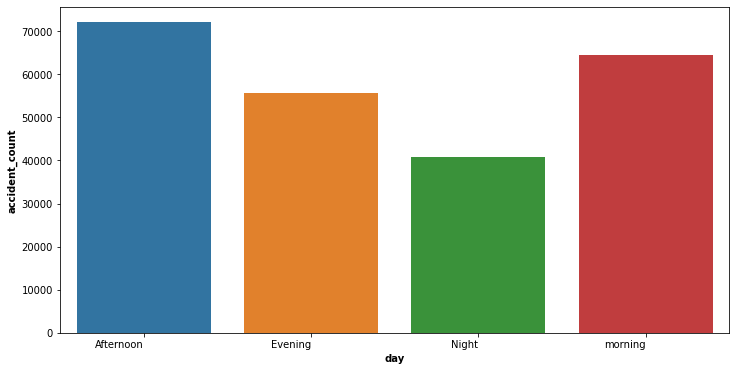

In [21]:
plt.figure(figsize=(12, 6))

bar_day=sns.barplot(data=data_day, x="day", y="accident_count")
bar_day.set_xticklabels(bar_day.get_xticklabels(), rotation=0, horizontalalignment='right')
bar_day.set_xlabel(bar_day.get_xlabel(), fontdict={'weight': 'bold'})
bar_day.set_ylabel(bar_day.get_ylabel(), fontdict={'weight': 'bold'})

plt.show()

# Conclusion: Our analysis shows that Afternoon is the most accident prone time of the day. 

# 5. Distribution of accidents per day of the week and hour

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

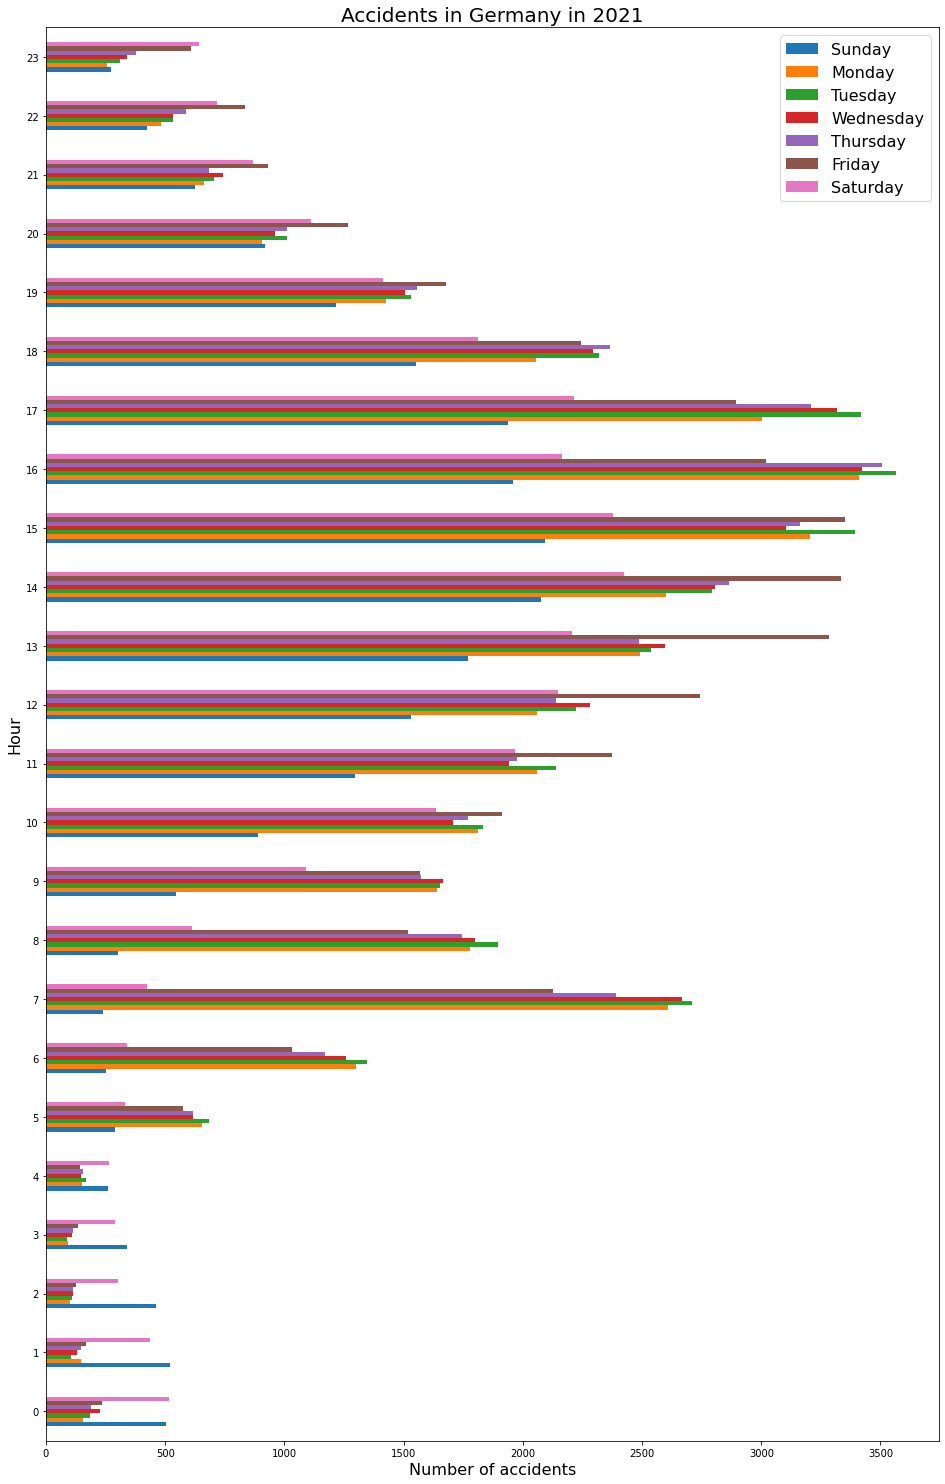

In [22]:
accidents_hour_day = data.groupby([data['USTUNDE'],data['UWOCHENTAG']]).count().OBJECTID
accidents_hour_day
accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],fontsize=16)
plt.title('Accidents in Germany in 2021',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

# Conclusion:  Above statistics imply that Friday is the most accident prone day (especially, 10:00 - 14:00 and 19:00 - 22:00). From 24:00 - 4:00, Sunday and Saturday are the most dangerous days.

# 6. Location analysis of the accidents causing death

In [23]:
# Define a map centered around Germany
germany_map = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Display the map
germany_map

In [24]:
# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(data_death.YGCSWGS84, data_death.XGCSWGS84, data_death.UKATEGORIE.astype(str)):
    folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(germany_map)
    
# Show map
germany_map

## Grouping accidents into clusters.

In [25]:
# Instantiate a mark cluster object for the car accidents
germany_accident_cluster = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

accidents = plugins.MarkerCluster().add_to(germany_accident_cluster)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(data_death.YGCSWGS84, data_death.XGCSWGS84, data_death.UKATEGORIE.astype(str)):
    folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
germany_accident_cluster

##  Creating HeatMap with time.
##  Displaying the intensity of accidents in different locations during each hour of the day.

In [26]:
# Create a map object of the city of Germany
germany_heatmap= folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Nested list that contains the latitude and the longitude of the accidents causing deaths 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(data_death.YGCSWGS84, data_death.XGCSWGS84,data_death.USTUNDE):
    hour_list[hour].append([lat,log]) 

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the accidents
HeatMapWithTime(hour_list, index).add_to(germany_heatmap)

germany_heatmap

## Conclusion: As time progresses from midnight, the frequency of accidents casuing deaths grows after 8:00 until 17:00.